In [1]:
!pip install shap
!pip install lightgbm
!pip install xgboost
!pip install imblearn
!pip install category_encoders
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [2]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.6 MB/s eta 0:00:00


In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
import optuna
import shap
from catboost import CatBoostClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [5]:
data = pd.read_csv('/content/SMOTETomek_data.csv')

In [6]:
data

,animal_type,age_group_intake,month_of_outcome,breed_type,color_group,intake_condition_group,has_name,age_days_outcome,los_at_shelter,is_fixed,outcome_group
0,Dog,Young Adult,February,Pure,Brown,Injured,0.000000,733.000000,1.000000,0.000000,Positive
1,Dog,Young Adult,February,Mix,Black,Healthy/Normal,1.000000,916.000000,1.000000,0.000000,Neutral
2,Cat,Puppy/Kitten,February,Pure,Red,Healthy/Normal,1.000000,176.000000,2.000000,1.000000,Positive
3,Other,Young Adult,February,Pure,Brown,Healthy/Normal,0.000000,732.000000,1.000000,0.000000,Negative
4,Cat,Young Adult,February,Pure,Brown,Healthy/Normal,1.000000,367.000000,1.000000,1.000000,Positive
...,...,...,...,...,...,...,...,...,...,...,...
240528,Dog,Puppy/Kitten,March,Mix,White,Healthy/Normal,0.728891,60.000000,1.000000,0.000000,Neutral
240529,Cat,Adult,February,Pure,Black,Injured,0.000000,1831.656075,5.000000,0.000000,Neutral
240530,Dog,Puppy/Kitten,September,Pure,Black,Healthy/Normal,0.000000,66.000000,3.000000,0.000000,Neutral
240531,Other,Puppy/Kitten,September,Mix,White,Healthy/Normal,1.000000,209.105975,57.658963,0.482337,Neutral


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240533 entries, 0 to 240532
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   animal_type             240533 non-null  object 
 1   age_group_intake        240533 non-null  object 
 2   month_of_outcome        240533 non-null  object 
 3   breed_type              240533 non-null  object 
 4   color_group             240533 non-null  object 
 5   intake_condition_group  240533 non-null  object 
 6   has_name                240533 non-null  float64
 7   age_days_outcome        240533 non-null  float64
 8   los_at_shelter          240533 non-null  float64
 9   is_fixed                240533 non-null  float64
 10  outcome_group           240533 non-null  object 
dtypes: float64(4), object(7)
memory usage: 20.2+ MB


In [8]:
data.isnull().sum()

,0
animal_type,0
age_group_intake,0
month_of_outcome,0
breed_type,0
color_group,0
intake_condition_group,0
has_name,0
age_days_outcome,0
los_at_shelter,0
is_fixed,0


## Encoding Everything

Label Encoding Target and Age Progression

In [9]:
from sklearn.preprocessing import LabelEncoder

# Columns to Label Encode
label_encode_cols = ['age_group_intake', 'outcome_group']

# Dictionary to store Label Encoders for inverse transformation
label_encoders = {}

# Apply Label Encoding to each specified column
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Apply encoding
    label_encoders[col] = le  # Store encoder for future inverse transformation

# Display the first few rows of the label encoded columns
print("\nLabel Encoded Columns:")
print(data[label_encode_cols].head())



Label Encoded Columns:
   age_group_intake  outcome_group
0                 3              2
1                 3              1
2                 1              2
3                 3              0
4                 3              2


One hot encoding the nominal columns

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Columns to One-Hot Encode
one_hot_cols = ['animal_type', 'month_of_outcome', 'breed_type', 'color_group', 'intake_condition_group']

# One-Hot Encoder Setup
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), one_hot_cols)
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Apply One-Hot Encoding
encoded_data = encoder.fit_transform(data)

# Get Encoded Feature Names
encoded_feature_names = encoder.get_feature_names_out()

# Create DataFrame with Encoded Features
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=data.index)

print("\nOne-Hot Encoded DataFrame Head:")
print(encoded_df.head())



One-Hot Encoded DataFrame Head:
   onehot__animal_type_Cat  onehot__animal_type_Dog  \
0                      0.0                      1.0   
1                      0.0                      1.0   
2                      1.0                      0.0   
3                      0.0                      0.0   
4                      1.0                      0.0   

   onehot__animal_type_Livestock  onehot__animal_type_Other  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        1.0   
4                            0.0                        0.0   

   onehot__month_of_outcome_August  onehot__month_of_outcome_December  \
0                              0.0                                0.0   
1                              0.0                                0.0   
2                              0.0    

In [11]:
# Remove 'remainder__' Prefix from Column Names
encoded_df.columns = encoded_df.columns.str.replace('remainder__', '')

# Display the Updated Column Names
print("\nUpdated Column Names (Without 'remainder__'):")
print(encoded_df.columns.tolist())

# Check the First Few Rows to Ensure Everything is Intact
print("\nFirst Few Rows After Cleaning Column Names:")
print(encoded_df.head())



Updated Column Names (Without 'remainder__'):
['onehot__animal_type_Cat', 'onehot__animal_type_Dog', 'onehot__animal_type_Livestock', 'onehot__animal_type_Other', 'onehot__month_of_outcome_August', 'onehot__month_of_outcome_December', 'onehot__month_of_outcome_February', 'onehot__month_of_outcome_January', 'onehot__month_of_outcome_July', 'onehot__month_of_outcome_June', 'onehot__month_of_outcome_March', 'onehot__month_of_outcome_May', 'onehot__month_of_outcome_November', 'onehot__month_of_outcome_October', 'onehot__month_of_outcome_September', 'onehot__breed_type_Pure', 'onehot__color_group_Brown', 'onehot__color_group_Gold', 'onehot__color_group_Grey', 'onehot__color_group_Multicolor', 'onehot__color_group_Other', 'onehot__color_group_Red', 'onehot__color_group_Tricolor', 'onehot__color_group_White', 'onehot__intake_condition_group_Healthy/Normal', 'onehot__intake_condition_group_Injured', 'onehot__intake_condition_group_Life Stage/Developmental', 'onehot__intake_condition_group_Oth

# ==========================
# 🚀 Model Training & Hyperparameter Tuning
# ==========================

In [12]:
encoded_df

,onehot__animal_type_Cat,onehot__animal_type_Dog,onehot__animal_type_Livestock,onehot__animal_type_Other,onehot__month_of_outcome_August,onehot__month_of_outcome_December,onehot__month_of_outcome_February,onehot__month_of_outcome_January,onehot__month_of_outcome_July,onehot__month_of_outcome_June,...,onehot__intake_condition_group_Injured,onehot__intake_condition_group_Life Stage/Developmental,onehot__intake_condition_group_Other/Unknown,onehot__intake_condition_group_Sick/Medical,age_group_intake,has_name,age_days_outcome,los_at_shelter,is_fixed,outcome_group
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.000000,733.000000,1.000000,0.000000,2.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.000000,916.000000,1.000000,0.000000,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.000000,176.000000,2.000000,1.000000,2.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.000000,732.000000,1.000000,0.000000,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.000000,367.000000,1.000000,1.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240528,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.728891,60.000000,1.000000,0.000000,1.0
240529,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.000000,1831.656075,5.000000,0.000000,1.0
240530,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,66.000000,3.000000,0.000000,1.0
240531,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.000000,209.105975,57.658963,0.482337,1.0


In [13]:
# Sample 20% of the encoded_df
sampled_df = encoded_df.sample(frac=0.2, random_state=42)  # random_state for reproducibility

sampled_df


,onehot__animal_type_Cat,onehot__animal_type_Dog,onehot__animal_type_Livestock,onehot__animal_type_Other,onehot__month_of_outcome_August,onehot__month_of_outcome_December,onehot__month_of_outcome_February,onehot__month_of_outcome_January,onehot__month_of_outcome_July,onehot__month_of_outcome_June,...,onehot__intake_condition_group_Injured,onehot__intake_condition_group_Life Stage/Developmental,onehot__intake_condition_group_Other/Unknown,onehot__intake_condition_group_Sick/Medical,age_group_intake,has_name,age_days_outcome,los_at_shelter,is_fixed,outcome_group
235717,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.0,375.000000,9.071400,1.000000,1.0
163712,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,733.000000,1.000000,0.000000,0.0
188821,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,284.967805,13.562230,0.718885,0.0
12772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,118.000000,42.000000,1.000000,2.0
170666,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1463.322017,2.322017,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71294,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.0,764.000000,24.000000,1.000000,2.0
93113,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,78.000000,31.000000,1.000000,1.0
233432,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1852.859254,4.286418,1.000000,1.0
225837,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,72.000000,11.149678,0.000000,1.0


In [14]:
X = sampled_df.drop('outcome_group', axis=1)
y = sampled_df['outcome_group']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify for classification

Random Forest Classifier

In [15]:
def tune_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
    }
    rf_model = RandomForestClassifier(**params, random_state=42)
    rf_model.fit(X_train, y_train)
    preds = rf_model.predict(X_test)
    return accuracy_score(y_test, preds)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(tune_rf, n_trials=30)
best_rf_params = study_rf.best_params
print("Best Random Forest Hyperparameters:", best_rf_params)

[I 2025-02-28 16:14:58,332] A new study created in memory with name: no-name-0d853b9d-5aff-41bd-90a9-5161d129509c
[I 2025-02-28 16:15:35,085] Trial 0 finished with value: 0.7552483891082935 and parameters: {'n_estimators': 497, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7552483891082935.
[I 2025-02-28 16:15:39,115] Trial 1 finished with value: 0.6862398669715236 and parameters: {'n_estimators': 250, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7552483891082935.
[I 2025-02-28 16:15:42,903] Trial 2 finished with value: 0.7227187694865932 and parameters: {'n_estimators': 132, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7552483891082935.
[I 2025-02-28 16:15:44,561] Trial 3 finished with value: 0.7113905632924548 and parameters: {'n_estimators': 78, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.

Best Random Forest Hyperparameters: {'n_estimators': 433, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 1}


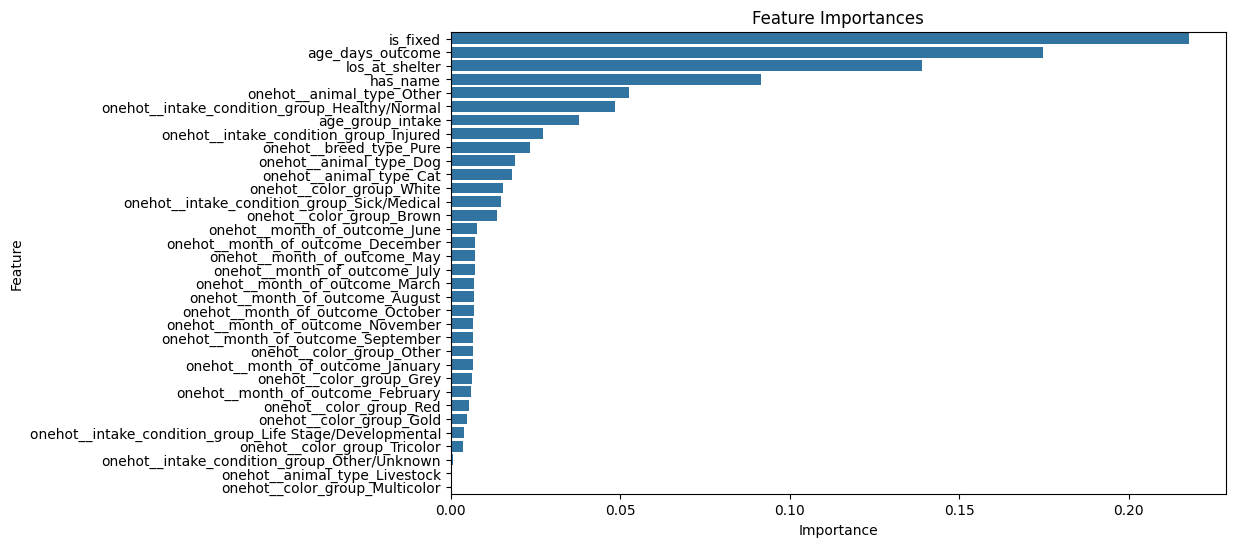

In [16]:
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

#feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


XGBoost Classifier

In [17]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Optuna Objective Function for Tuning XGBoost
def tune_xgb(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }
    model = XGBClassifier(**params, use_label_encoder=False, random_state=42, eval_metric='logloss')

    # Train on Already Defined Splits
    model.fit(X_train, y_train)

    # Predict and Evaluate
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Optuna Study for Hyperparameter Tuning
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(tune_xgb, n_trials=30)

# Best Hyperparameters
best_xgb_params = study_xgb.best_params
print("Best XGBoost Hyperparameters:", best_xgb_params)


[I 2025-02-28 16:22:17,523] A new study created in memory with name: no-name-e8c0fb62-d963-4a46-9594-1f03c1639600
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:22:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-28 16:22:26,575] Trial 0 finished with value: 0.7727083766368739 and parameters: {'learning_rate': 0.4000352453122439, 'n_estimators': 785, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 1.8477816272501686, 'subsample': 0.8812978293809626}. Best is trial 0 with value: 0.7727083766368739.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:22:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-28 16:22:38,281] Trial 1 finished with value: 0.7580544585325296 and parameters: {'learning_rate': 0.04194463540648188, 'n_estimators': 869, 'max_dept

Best XGBoost Hyperparameters: {'learning_rate': 0.28623439958207864, 'n_estimators': 381, 'max_depth': 11, 'min_child_weight': 3, 'gamma': 0.07056294490629964, 'subsample': 0.9243987936564072}


In [18]:
import plotly.express as px
from xgboost import XGBClassifier
import pandas as pd

# Train the XGBClassifier Model with Best Parameters from Optuna
xgb_model = XGBClassifier(**best_xgb_params, use_label_encoder=False, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Get Feature Importances and Create DataFrame
feature_importances = xgb_model.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by Importance in Descending Order
importances_df = importances_df.sort_values(by='Importance', ascending=True)  # Sort Ascending for Horizontal Bar Chart

# Create the Plotly Bar Chart
fig = px.bar(importances_df, x='Importance', y='Feature',
             orientation='h',  # Horizontal Bar Chart
             title='XGBoost Feature Importance',
             labels={'Importance': 'Importance Score', 'Feature': 'Feature Name'},
             color='Importance',  # Color by Importance for Better Visualization
             color_continuous_scale='Viridis'  # Color Scheme
            )

# Update Layout for Better Appearance
fig.update_layout(
    xaxis_title='Importance Score',
    yaxis_title='Feature Name',
    yaxis={'categoryorder': 'total ascending'},  # Ensure Proper Sorting
    title_x=0.5  # Center Title
)

fig.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:26:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


LightGBM

In [19]:
def tune_lgbm(trial):
    params = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'num_class': len(np.unique(y_train)),  # Number of classes in your target variable
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']),
        'num_leaves': trial.suggest_int('num_leaves', 20, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    #Set bagging_freq to 0 if boosting type is goss to disable bagging.
    if params['boosting_type'] == 'goss':
        params['bagging_freq'] = 0
        params['bagging_fraction'] = 1.0
    model = LGBMClassifier(**params, random_state=42, n_estimators=100) #Added n_estimators
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(tune_lgbm, n_trials=30) #Reduced n_trials for faster execution
best_lgbm_params = study_lgbm.best_params
print("Best LightGBM Hyperparameters:", best_lgbm_params)

[I 2025-02-28 16:26:39,254] A new study created in memory with name: no-name-b1bc9a9c-5699-444e-88b2-0460a7938a62


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.48285452510914956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48285452510914956
[LightGBM] [Warning] bagging_fraction is set=0.6142114007353718, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142114007353718
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.48285452510914956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48285452510914956
[LightGBM] [Warning] bagging_fraction is set=0.6142114007353718, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142114007353718
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011908 sec

[I 2025-02-28 16:26:45,477] Trial 0 finished with value: 0.8191644148825608 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 481, 'learning_rate': 0.3984089145011736, 'feature_fraction': 0.48285452510914956, 'bagging_fraction': 0.6142114007353718, 'bagging_freq': 1, 'min_child_samples': 24}. Best is trial 0 with value: 0.8191644148825608.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.4947755225828999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4947755225828999
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.4947755225828999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4947755225828999
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-02-28 16:26:49,193] Trial 1 finished with value: 0.7923508626065268 and parameters: {'boosting_type': 'goss', 'num_leaves': 388, 'learning_rate': 0.48561275598741455, 'feature_fraction': 0.4947755225828999, 'bagging_fraction': 0.9946307872510985, 'bagging_freq': 5, 'min_child_samples': 59}. Best is trial 0 with value: 0.8191644148825608.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9178959694724036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9178959694724036
[LightGBM] [Warning] bagging_fraction is set=0.6061441580620349, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6061441580620349
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9178959694724036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9178959694724036
[LightGBM] [Warning] bagging_fraction is set=0.6061441580620349, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6061441580620349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003375 seconds

[I 2025-02-28 16:26:57,616] Trial 2 finished with value: 0.8133444190397007 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 488, 'learning_rate': 0.32302572683182956, 'feature_fraction': 0.9178959694724036, 'bagging_fraction': 0.6061441580620349, 'bagging_freq': 7, 'min_child_samples': 15}. Best is trial 0 with value: 0.8191644148825608.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8078188946829135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078188946829135
[LightGBM] [Warning] bagging_fraction is set=0.44417310223264367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44417310223264367
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8078188946829135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078188946829135
[LightGBM] [Warning] bagging_fraction is set=0.44417310223264367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44417310223264367
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007684 sec

[I 2025-02-28 16:27:09,109] Trial 3 finished with value: 0.8267511951777178 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 928, 'learning_rate': 0.1224845493798838, 'feature_fraction': 0.8078188946829135, 'bagging_fraction': 0.44417310223264367, 'bagging_freq': 2, 'min_child_samples': 13}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8086192800210767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8086192800210767
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8086192800210767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8086192800210767
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-02-28 16:27:15,070] Trial 4 finished with value: 0.8225940552899605 and parameters: {'boosting_type': 'goss', 'num_leaves': 376, 'learning_rate': 0.16983683230307342, 'feature_fraction': 0.8086192800210767, 'bagging_fraction': 0.9661659662664748, 'bagging_freq': 4, 'min_child_samples': 9}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7816831051316451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7816831051316451
[LightGBM] [Warning] bagging_fraction is set=0.824420519057639, subsample=1.0 will be ignored. Current value: bagging_fraction=0.824420519057639
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7816831051316451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7816831051316451
[LightGBM] [Warning] bagging_fraction is set=0.824420519057639, subsample=1.0 will be ignored. Current value: bagging_fraction=0.824420519057639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007906 seconds.
Yo

[I 2025-02-28 16:27:23,582] Trial 5 finished with value: 0.8060694242361256 and parameters: {'boosting_type': 'dart', 'num_leaves': 78, 'learning_rate': 0.4336382656810914, 'feature_fraction': 0.7816831051316451, 'bagging_fraction': 0.824420519057639, 'bagging_freq': 4, 'min_child_samples': 20}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6557909182111663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6557909182111663
[LightGBM] [Warning] bagging_fraction is set=0.9856501616037782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9856501616037782
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6557909182111663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6557909182111663
[LightGBM] [Warning] bagging_fraction is set=0.9856501616037782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9856501616037782
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007800 seconds

[I 2025-02-28 16:27:33,466] Trial 6 finished with value: 0.7951569320307629 and parameters: {'boosting_type': 'dart', 'num_leaves': 97, 'learning_rate': 0.1729838869849639, 'feature_fraction': 0.6557909182111663, 'bagging_fraction': 0.9856501616037782, 'bagging_freq': 5, 'min_child_samples': 13}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8637791152817831, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8637791152817831
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8637791152817831, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8637791152817831
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-02-28 16:27:40,767] Trial 7 finished with value: 0.7922469341093328 and parameters: {'boosting_type': 'goss', 'num_leaves': 626, 'learning_rate': 0.4955239938757051, 'feature_fraction': 0.8637791152817831, 'bagging_fraction': 0.7074888070095058, 'bagging_freq': 5, 'min_child_samples': 18}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8294607734295052, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8294607734295052
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8294607734295052, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8294607734295052
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-02-28 16:27:45,225] Trial 8 finished with value: 0.7871544377468301 and parameters: {'boosting_type': 'goss', 'num_leaves': 382, 'learning_rate': 0.23097286855514235, 'feature_fraction': 0.8294607734295052, 'bagging_fraction': 0.6826547866079709, 'bagging_freq': 5, 'min_child_samples': 89}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6599181700323111, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6599181700323111
[LightGBM] [Warning] bagging_fraction is set=0.5769771177602939, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5769771177602939
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6599181700323111, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6599181700323111
[LightGBM] [Warning] bagging_fraction is set=0.5769771177602939, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5769771177602939
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007650 seconds

[I 2025-02-28 16:27:50,789] Trial 9 finished with value: 0.8191644148825608 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 728, 'learning_rate': 0.4558545783668434, 'feature_fraction': 0.6599181700323111, 'bagging_fraction': 0.5769771177602939, 'bagging_freq': 4, 'min_child_samples': 66}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9483067864792476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9483067864792476
[LightGBM] [Warning] bagging_fraction is set=0.402807584373038, subsample=1.0 will be ignored. Current value: bagging_fraction=0.402807584373038
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9483067864792476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9483067864792476
[LightGBM] [Warning] bagging_fraction is set=0.402807584373038, subsample=1.0 will be ignored. Current value: bagging_fraction=0.402807584373038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007803 seconds.
Yo

[I 2025-02-28 16:27:57,001] Trial 10 finished with value: 0.7659530243192684 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 997, 'learning_rate': 0.027188464543301025, 'feature_fraction': 0.9483067864792476, 'bagging_fraction': 0.402807584373038, 'bagging_freq': 1, 'min_child_samples': 41}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.7434945437783662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7434945437783662
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.7434945437783662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7434945437783662
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-02-28 16:28:02,328] Trial 11 finished with value: 0.7980669299521929 and parameters: {'boosting_type': 'goss', 'num_leaves': 964, 'learning_rate': 0.10405004679967744, 'feature_fraction': 0.7434945437783662, 'bagging_fraction': 0.41307151112310025, 'bagging_freq': 2, 'min_child_samples': 39}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5948667698590777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5948667698590777
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5948667698590777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5948667698590777
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-02-28 16:28:06,931] Trial 12 finished with value: 0.8093951361463313 and parameters: {'boosting_type': 'goss', 'num_leaves': 253, 'learning_rate': 0.13312156491224317, 'feature_fraction': 0.5948667698590777, 'bagging_fraction': 0.8712313417166838, 'bagging_freq': 3, 'min_child_samples': 6}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.835223709490728, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.835223709490728
[LightGBM] [Warning] bagging_fraction is set=0.5271444909539524, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5271444909539524
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.835223709490728, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.835223709490728
[LightGBM] [Warning] bagging_fraction is set=0.5271444909539524, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5271444909539524
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003357 seconds.
Yo

[I 2025-02-28 16:28:14,426] Trial 13 finished with value: 0.7720848056537103 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 840, 'learning_rate': 0.024220946201750734, 'feature_fraction': 0.835223709490728, 'bagging_fraction': 0.5271444909539524, 'bagging_freq': 3, 'min_child_samples': 36}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9967408436790512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9967408436790512
[LightGBM] [Warning] bagging_fraction is set=0.8351910591725797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8351910591725797
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9967408436790512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9967408436790512
[LightGBM] [Warning] bagging_fraction is set=0.8351910591725797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8351910591725797
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003344 seconds

[I 2025-02-28 16:28:33,611] Trial 14 finished with value: 0.8062772812305135 and parameters: {'boosting_type': 'dart', 'num_leaves': 656, 'learning_rate': 0.2538269105024133, 'feature_fraction': 0.9967408436790512, 'bagging_fraction': 0.8351910591725797, 'bagging_freq': 7, 'min_child_samples': 78}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7253047306540659, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7253047306540659
[LightGBM] [Warning] bagging_fraction is set=0.4894294267214828, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4894294267214828
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7253047306540659, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7253047306540659
[LightGBM] [Warning] bagging_fraction is set=0.4894294267214828, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4894294267214828
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005193 seconds

[I 2025-02-28 16:28:39,078] Trial 15 finished with value: 0.8061733527333195 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 244, 'learning_rate': 0.09648546032522312, 'feature_fraction': 0.7253047306540659, 'bagging_fraction': 0.4894294267214828, 'bagging_freq': 2, 'min_child_samples': 29}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5891209577513721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5891209577513721
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5891209577513721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5891209577513721
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-02-28 16:28:43,454] Trial 16 finished with value: 0.8003533568904594 and parameters: {'boosting_type': 'goss', 'num_leaves': 773, 'learning_rate': 0.2108131061251846, 'feature_fraction': 0.5891209577513721, 'bagging_fraction': 0.7357122127950356, 'bagging_freq': 3, 'min_child_samples': 49}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8912367407240984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8912367407240984
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8912367407240984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8912367407240984
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-02-28 16:28:52,136] Trial 17 finished with value: 0.8202036998545001 and parameters: {'boosting_type': 'goss', 'num_leaves': 588, 'learning_rate': 0.2936913895870771, 'feature_fraction': 0.8912367407240984, 'bagging_fraction': 0.8873331786239368, 'bagging_freq': 2, 'min_child_samples': 6}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7893624899550512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7893624899550512
[LightGBM] [Warning] bagging_fraction is set=0.7707249540198785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7707249540198785
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7893624899550512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7893624899550512
[LightGBM] [Warning] bagging_fraction is set=0.7707249540198785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7707249540198785
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008218 seconds

[I 2025-02-28 16:28:58,253] Trial 18 finished with value: 0.8150072749948035 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 859, 'learning_rate': 0.16614043210918236, 'feature_fraction': 0.7893624899550512, 'bagging_fraction': 0.7707249540198785, 'bagging_freq': 6, 'min_child_samples': 100}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6828067434151186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6828067434151186
[LightGBM] [Warning] bagging_fraction is set=0.9187157323583828, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9187157323583828
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6828067434151186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6828067434151186
[LightGBM] [Warning] bagging_fraction is set=0.9187157323583828, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9187157323583828
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005092 seconds

[I 2025-02-28 16:29:13,659] Trial 19 finished with value: 0.7841405113282062 and parameters: {'boosting_type': 'dart', 'num_leaves': 251, 'learning_rate': 0.057219008149996725, 'feature_fraction': 0.6828067434151186, 'bagging_fraction': 0.9187157323583828, 'bagging_freq': 3, 'min_child_samples': 31}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.4068941385508817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4068941385508817
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.4068941385508817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4068941385508817
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-02-28 16:29:17,601] Trial 20 finished with value: 0.7888172937019331 and parameters: {'boosting_type': 'goss', 'num_leaves': 368, 'learning_rate': 0.3366504669537831, 'feature_fraction': 0.4068941385508817, 'bagging_fraction': 0.4956164033234813, 'bagging_freq': 1, 'min_child_samples': 49}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.895337991690984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.895337991690984
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.895337991690984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.895337991690984
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will b

[I 2025-02-28 16:29:26,573] Trial 21 finished with value: 0.8223861982955727 and parameters: {'boosting_type': 'goss', 'num_leaves': 599, 'learning_rate': 0.2968318639577769, 'feature_fraction': 0.895337991690984, 'bagging_fraction': 0.9309717137135861, 'bagging_freq': 2, 'min_child_samples': 8}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9542728149501509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9542728149501509
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9542728149501509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9542728149501509
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-02-28 16:29:34,200] Trial 22 finished with value: 0.8206194138432759 and parameters: {'boosting_type': 'goss', 'num_leaves': 547, 'learning_rate': 0.17310883175078406, 'feature_fraction': 0.9542728149501509, 'bagging_fraction': 0.9382181187384601, 'bagging_freq': 2, 'min_child_samples': 6}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.7895173082760812, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7895173082760812
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.7895173082760812, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7895173082760812
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-02-28 16:29:41,477] Trial 23 finished with value: 0.8189565578881729 and parameters: {'boosting_type': 'goss', 'num_leaves': 911, 'learning_rate': 0.2957837396057033, 'feature_fraction': 0.7895173082760812, 'bagging_fraction': 0.7894455834470345, 'bagging_freq': 4, 'min_child_samples': 24}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8617700334921075, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8617700334921075
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8617700334921075, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8617700334921075
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-02-28 16:29:49,886] Trial 24 finished with value: 0.7826855123674912 and parameters: {'boosting_type': 'goss', 'num_leaves': 783, 'learning_rate': 0.38922129536519146, 'feature_fraction': 0.8617700334921075, 'bagging_fraction': 0.9408888401825383, 'bagging_freq': 2, 'min_child_samples': 15}. Best is trial 3 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9165475016548958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9165475016548958
[LightGBM] [Warning] bagging_fraction is set=0.8762695261975411, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8762695261975411
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9165475016548958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9165475016548958
[LightGBM] [Warning] bagging_fraction is set=0.8762695261975411, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8762695261975411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005535 seconds

[I 2025-02-28 16:29:53,602] Trial 25 finished with value: 0.8285179796300145 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 154, 'learning_rate': 0.25694140532422705, 'feature_fraction': 0.9165475016548958, 'bagging_fraction': 0.8762695261975411, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 25 with value: 0.8285179796300145.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.979524656442088, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.979524656442088
[LightGBM] [Warning] bagging_fraction is set=0.6562141862455111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6562141862455111
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.979524656442088, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.979524656442088
[LightGBM] [Warning] bagging_fraction is set=0.6562141862455111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6562141862455111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003423 seconds.
Yo

[I 2025-02-28 16:29:57,559] Trial 26 finished with value: 0.820307628351694 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 160, 'learning_rate': 0.19783406842019152, 'feature_fraction': 0.979524656442088, 'bagging_fraction': 0.6562141862455111, 'bagging_freq': 3, 'min_child_samples': 26}. Best is trial 25 with value: 0.8285179796300145.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8191736842176698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8191736842176698
[LightGBM] [Warning] bagging_fraction is set=0.8677310372766718, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8677310372766718
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8191736842176698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8191736842176698
[LightGBM] [Warning] bagging_fraction is set=0.8677310372766718, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8677310372766718
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007680 seconds

[I 2025-02-28 16:29:59,536] Trial 27 finished with value: 0.7752026605695281 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.12612259619378677, 'feature_fraction': 0.8191736842176698, 'bagging_fraction': 0.8677310372766718, 'bagging_freq': 4, 'min_child_samples': 33}. Best is trial 25 with value: 0.8285179796300145.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8191736842176698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8191736842176698
[LightGBM] [Warning] bagging_fraction is set=0.8677310372766718, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8677310372766718
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_fre

[I 2025-02-28 16:30:04,084] Trial 28 finished with value: 0.8294533361047599 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 173, 'learning_rate': 0.2536976395285876, 'feature_fraction': 0.767807552541902, 'bagging_fraction': 0.7822609762065069, 'bagging_freq': 4, 'min_child_samples': 11}. Best is trial 28 with value: 0.8294533361047599.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5978005510601909, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5978005510601909
[LightGBM] [Warning] bagging_fraction is set=0.7526137563673434, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7526137563673434
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5978005510601909, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5978005510601909
[LightGBM] [Warning] bagging_fraction is set=0.7526137563673434, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7526137563673434
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008055 seconds

[I 2025-02-28 16:30:08,615] Trial 29 finished with value: 0.8250883392226148 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 320, 'learning_rate': 0.2532944241922744, 'feature_fraction': 0.5978005510601909, 'bagging_fraction': 0.7526137563673434, 'bagging_freq': 1, 'min_child_samples': 22}. Best is trial 28 with value: 0.8294533361047599.


Best LightGBM Hyperparameters: {'boosting_type': 'gbdt', 'num_leaves': 173, 'learning_rate': 0.2536976395285876, 'feature_fraction': 0.767807552541902, 'bagging_fraction': 0.7822609762065069, 'bagging_freq': 4, 'min_child_samples': 11}


In [20]:
lgbm_model = LGBMClassifier(**best_lgbm_params, random_state=42, n_estimators=100)
lgbm_model.fit(X_train, y_train)

# Get feature importances
feature_importances = lgbm_model.feature_importances_

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Create the Plotly bar chart
fig = px.bar(importances_df, x='Importance', y='Feature', orientation='h',
             title='LightGBM Feature Importance', labels={'Importance': 'Importance Score', 'Feature': 'Feature Name'})
fig.show()

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003367 seconds.
Yo

Decision Tree Classifier

In [21]:
def tune_decision_tree(trial):
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 3, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20)
    }
    model = DecisionTreeClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(tune_decision_tree, n_trials=30)
best_dt_params = study_dt.best_params
print("Best Decision Tree Hyperparameters:", best_dt_params)

[I 2025-02-28 16:30:11,983] A new study created in memory with name: no-name-812d6f0f-e355-489f-b4cf-8e38f57b84fe
[I 2025-02-28 16:30:12,270] Trial 0 finished with value: 0.7434005404281854 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 27, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7434005404281854.
[I 2025-02-28 16:30:12,591] Trial 1 finished with value: 0.7482851797963002 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 46, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7482851797963002.
[I 2025-02-28 16:30:12,715] Trial 2 finished with value: 0.7218873415090418 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.7482851797963002.
[I 2025-02-28 16:30:12,972] Trial 3 finished with value: 0.7465183953440033 and parameters: {'criterion': 'gini', 'splitter': 'best'

Best Decision Tree Hyperparameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 46, 'min_samples_split': 3, 'min_samples_leaf': 2}


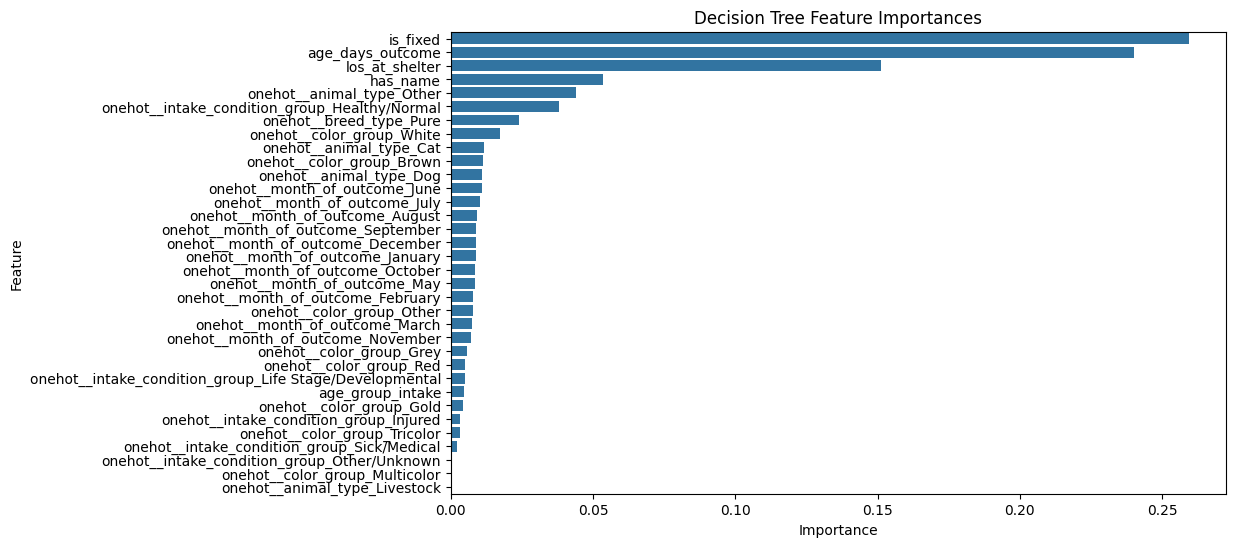

In [22]:
model = DecisionTreeClassifier(**best_dt_params, random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

CatBoost Classifier

In [23]:
optuna.logging.set_verbosity(optuna.logging.INFO)


In [24]:
from catboost import CatBoostClassifier
import optuna
from sklearn.metrics import accuracy_score

# Optuna Objective Function for Tuning CatBoost
def tune_catboost(trial):
    params = {
        'loss_function': 'MultiClass',    # Corrected syntax for loss function
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'iterations': trial.suggest_int('iterations', 100, 1000)
    }

    # Initialize CatBoost Model with Suggested Hyperparameters
    model = CatBoostClassifier(
        **params,
        random_seed=42,
        verbose=0,
        eval_metric='Accuracy'   # Evaluation metric for multiclass
    )

    # Train on Already Defined Splits
    model.fit(X_train, y_train)

    # Predict and Evaluate
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Optuna Study for Hyperparameter Tuning
study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(tune_catboost, n_trials=30)

# Best Hyperparameters
best_catboost_params = study_catboost.best_params
print("\nBest CatBoost Hyperparameters:", best_catboost_params)


[I 2025-02-28 16:30:21,015] A new study created in memory with name: no-name-ce4ec895-8b6f-465f-ab41-befcc8c3828b
[I 2025-02-28 16:30:35,427] Trial 0 finished with value: 0.7663687383080441 and parameters: {'learning_rate': 0.04419949659351448, 'depth': 6, 'l2_leaf_reg': 5.1016514099829715, 'bagging_temperature': 0.3540033652365291, 'iterations': 648}. Best is trial 0 with value: 0.7663687383080441.
[I 2025-02-28 16:30:56,848] Trial 1 finished with value: 0.7531698191644148 and parameters: {'learning_rate': 0.03625305990175254, 'depth': 9, 'l2_leaf_reg': 6.854376022716526, 'bagging_temperature': 0.3302051589354932, 'iterations': 313}. Best is trial 0 with value: 0.7663687383080441.
[I 2025-02-28 16:31:15,044] Trial 2 finished with value: 0.7931822905840782 and parameters: {'learning_rate': 0.1431100250992995, 'depth': 6, 'l2_leaf_reg': 7.322387646855422, 'bagging_temperature': 0.23607957809239188, 'iterations': 846}. Best is trial 2 with value: 0.7931822905840782.
[I 2025-02-28 16:31:2


Best CatBoost Hyperparameters: {'learning_rate': 0.2949234682845818, 'depth': 8, 'l2_leaf_reg': 4.161684231995317, 'bagging_temperature': 0.6511555020401413, 'iterations': 975}


<ipython-input-25-d34ff3fa6d2b>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




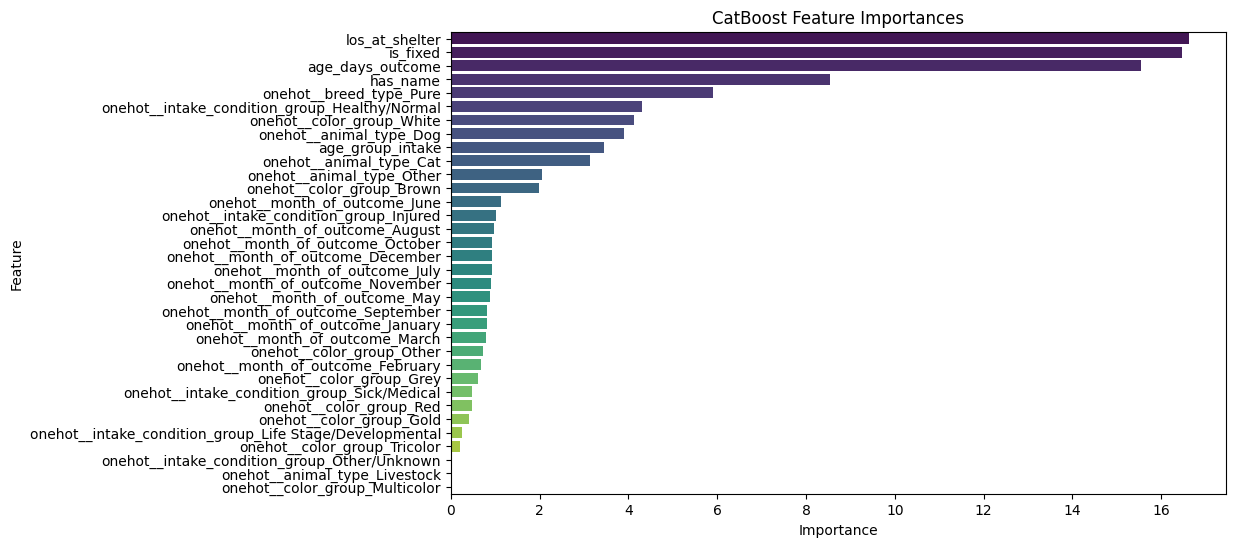

In [25]:
# Train CatBoost with Best Hyperparameters
model = CatBoostClassifier(
    **best_catboost_params,
    random_seed=42,
    verbose=0
).fit(X_train, y_train)

# Get Feature Importances from CatBoost
importances = model.get_feature_importance()
feature_names = X_train.columns

# Create a DataFrame for Visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances Using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('CatBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

TabNet Classifier

In [ ]:
# import torch
# from pytorch_tabnet.tab_model import TabNetClassifier
# import optuna
# from optuna.logging import set_verbosity, WARNING


# # Optuna Objective Function for Tuning TabNet
# def tune_tabnet(trial):
#     params = {
#         'n_d': trial.suggest_int('n_d', 8, 64),
#         'n_a': trial.suggest_int('n_a', 8, 64),
#         'n_steps': trial.suggest_int('n_steps', 3, 10),
#         'gamma': trial.suggest_float('gamma', 1.0, 2.0),
#         'lambda_sparse': trial.suggest_float('lambda_sparse', 1e-5, 1e-3),
#         'mask_type': trial.suggest_categorical('mask_type', ['sparsemax', 'entmax']),
#         'optimizer_params': dict(lr=trial.suggest_float('lr', 1e-4, 1e-1, log=True))
#     }

#     # Initialize TabNet Classifier with Verbosity Enabled
#     model = TabNetClassifier(
#         **params,
#         verbose=1,              # Enable epoch-level progress
#         seed=42,
#         optimizer_fn=torch.optim.Adam,
#         device_name='cuda'      # Use GPU if available
#     )

#     # Train on Already Defined Splits
#     model.fit(
#         X_train.values,
#         y_train.values,
#         eval_set=[(X_test.values, y_test.values)],
#         eval_name=['valid'],
#         eval_metric=['accuracy'],
#         batch_size=4096,            # Batch size is specified here
#         virtual_batch_size=512,     # Virtual batch size is also specified here
#         max_epochs=100,             # Lower max epochs
#         patience=20,                # Early stopping patience
#         drop_last=False
#     )

#     # Predict and Evaluate
#     preds = model.predict(X_test.values)
#     accuracy = accuracy_score(y_test, preds)
#     return accuracy

# # Optuna Study for Hyperparameter Tuning with Progress Bar
# study_tabnet = optuna.create_study(direction='maximize')
# study_tabnet.optimize(tune_tabnet, n_trials=5, show_progress_bar=True)

# # Best Hyperparameters
# best_tabnet_params = study_tabnet.best_params
# print("\nBest TabNet Hyperparameters:", best_tabnet_params)


Best Hyperparameters for all models

In [26]:
# Train Models with Best Hyperparameters
rf_final = RandomForestClassifier(**best_rf_params, random_state=42).fit(X_train, y_train)
xgb_final = XGBClassifier(**best_xgb_params, random_state=42).fit(X_train, y_train)
dt_final = DecisionTreeClassifier(**best_dt_params, random_state=42).fit(X_train, y_train)
lgbm_final = LGBMClassifier(**best_lgbm_params, random_state=42, n_estimators=100).fit(X_train, y_train)
catboost_final = CatBoostClassifier(**best_catboost_params, random_seed=42, verbose=0).fit(X_train, y_train)


# Make Predictions
rf_preds = rf_final.predict(X_test)
xgb_preds = xgb_final.predict(X_test)
dt_preds = dt_final.predict(X_test)
lgbm_preds = lgbm_final.predict(X_test)
catboost_preds = catboost_final.predict(X_test)


# Store Best Hyperparameters
best_params = {
    'Random Forest': best_rf_params,
    'XGBoost': best_xgb_params,
    'Decision Tree': best_dt_params,
    'LightGBM': best_lgbm_params,
    'CatBoost': best_catboost_params
}

# Store Accuracy Scores
accuracy_scores = {
    'Random Forest': accuracy_score(y_test, rf_preds),
    'XGBoost': accuracy_score(y_test, xgb_preds),
    'Decision Tree': accuracy_score(y_test, dt_preds),
    'LightGBM': accuracy_score(y_test, lgbm_preds),
    'CatBoost': accuracy_score(y_test, catboost_preds)
}

# Display Model Performance and Best Hyperparameters
print("\nModel Performance and Best Hyperparameters:")
for model_name, acc in accuracy_scores.items():
    print(f"\n{model_name} Accuracy: {acc:.4f}")
    print("Best Hyperparameters:", best_params[model_name])


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008305 seconds.
Yo

In [27]:
# Class Mapping from Label Encoding
class_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

In [28]:

y_score = rf_final.predict_proba(X_test)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

#ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#ROC curve for a specific class
fig = px.line()
for i in range(n_classes):
    # Use class_mapping to get the actual class label
    class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found
    fig.add_scatter(x=fpr[i], y=tpr[i], name=f"ROC curve of {class_label} (area = {roc_auc[i]:.2f})")

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(title_text="ROC Curves for Random Forest Classifier",
                  xaxis_range=[0,1],yaxis_range=[0,1])
fig.show()


In [29]:
# Get Prediction Probabilities from XGBoost Model
y_score = xgb_final.predict_proba(X_test)

# Binarize the Output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC Curve and AUC for Each Class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC Curve Visualization with Class Labels
fig = px.line()
for i in range(n_classes):
    # Use class_mapping to Get Actual Class Labels
    class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found
    fig.add_scatter(x=fpr[i], y=tpr[i], mode='lines',
                    name=f"ROC curve of {class_label} (AUC = {roc_auc[i]:.2f})")

# Diagonal Line for Random Classifier
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Update Axes and Layout
fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(
    title_text="ROC Curves for XGBoost Classifier",
    xaxis_range=[0, 1],
    yaxis_range=[0, 1],
    legend_title_text="Class"
)

fig.show()


In [30]:
# Get Prediction Probabilities from LightGBM Model
y_score = lgbm_model.predict_proba(X_test)

# Binarize the Output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC Curve and AUC for Each Class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC Curve Visualization with Class Labels
fig = px.line()
for i in range(n_classes):
    # Use class_mapping to Get Actual Class Labels
    class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found
    fig.add_scatter(x=fpr[i], y=tpr[i], mode='lines',
                    name=f"ROC curve of {class_label} (AUC = {roc_auc[i]:.2f})")

# Diagonal Line for Random Classifier
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Update Axes and Layout
fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(
    title_text="ROC Curves for LightGBM Classifier",
    xaxis_range=[0, 1],
    yaxis_range=[0, 1],
    legend_title_text="Class"
)

fig.show()


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069


In [31]:
# Get Prediction Probabilities from Decision Tree Model
y_score = dt_final.predict_proba(X_test)

# Binarize the Output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC Curve and AUC for Each Class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC Curve Visualization with Class Labels
fig = px.line()
for i in range(n_classes):
    # Use class_mapping to Get Actual Class Labels
    class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found
    fig.add_scatter(x=fpr[i], y=tpr[i], mode='lines',
                    name=f"ROC curve of {class_label} (AUC = {roc_auc[i]:.2f})")

# Diagonal Line for Random Classifier
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Update Axes and Layout
fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(
    title_text="ROC Curves for Decision Tree Classifier",
    xaxis_range=[0, 1],
    yaxis_range=[0, 1],
    legend_title_text="Class"
)

fig.show()


In [32]:
# Predict Probabilities with CatBoost
y_score = catboost_final.predict_proba(X_test)

# Binarize the Output for Multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# ROC Curve and AUC for Each Class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves for CatBoost
fig = px.line()
for i in range(n_classes):
    # Use class_mapping to get the actual class label
    class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found
    fig.add_scatter(x=fpr[i], y=tpr[i],
                    name=f"ROC curve of {class_label} (area = {roc_auc[i]:.2f})")

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(title_text="ROC Curves for CatBoost Classifier",
                  xaxis_range=[0,1],yaxis_range=[0,1])
fig.show()


In [33]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming rf_final, xgb_final, dt_final, and lgbm_model are already defined and trained
models = {
    'Random Forest': rf_final,
    'XGBoost': xgb_final,
    'Decision Tree': dt_final,
    'LightGBM': lgbm_model,
    'CatBoost': catboost_final
}

fig = go.Figure()

# Binarize the Labels for Multiclass ROC Curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Plot ROC Curves for Each Model and Class
for model_name, model in models.items():
    y_probs = model.predict_proba(X_test)
    for i in range(n_classes):
        # Use class_mapping to Get Actual Class Labels
        class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found

        # Compute ROC Curve and AUC
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)

        # Add ROC Curve to the Plot
        fig.add_trace(go.Scatter(
            x=fpr, y=tpr, mode='lines',
            name=f'{model_name} - {class_label} (AUC = {roc_auc:.2f})'
        ))

# Diagonal Line for Random Classifier
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Update Axes and Layout
fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(
    title_text="ROC Curves for All Models",
    xaxis_range=[0, 1],
    yaxis_range=[0, 1],
    legend_title_text="Model and Class"
)

fig.show()


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069


## Ensemble Stacked Model

LightGBM + XGBoost + CatBoost Compliemntary models with Logistic Regression as the meta learner

In [34]:
!pip install joblib tqdm


In [37]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import joblib
from tqdm import tqdm  # Optional: Progress Bar
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Base Models with Original Tuning Parameters
base_models = [
    ('lgbm', LGBMClassifier(**best_lgbm_params,
                           random_state=42,
                           verbose=1)),

    ('xgb', XGBClassifier(**best_xgb_params,
                         random_state=42,
                         verbosity=1)),

    ('catboost', CatBoostClassifier(**best_catboost_params,
                                    random_seed=42,
                                    logging_level='Verbose'))
]

# Meta-Model for Final Prediction
meta_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='saga',            # Faster for large datasets
    penalty='l2',             # Regularization to speed up convergence
    n_jobs=-1,                # Use all CPU cores
    verbose=1,                # Verbose for progress tracking
    warm_start=True,          # Reuse the solution of the previous call to fit
    multi_class='multinomial' # Multiclass Classification
)

# Stacking Classifier with Top 3 Models and Verbosity
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,                    # Cross-validation for meta-model
    n_jobs=-1,               # Use all CPU cores
    stack_method='predict_proba'  # Use probabilities as input for meta-model
)

# Optional: Progress Bar Using TQDM
print("\nTraining Stacking Ensemble Model...")
for name, model in tqdm(base_models, desc="Training Base Models"):
    model.fit(X_train, y_train)

# Train Stacking Ensemble
stacking_clf.fit(X_train, y_train)

# Make Predictions and Evaluate
stacking_preds = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_preds)
print("\nStacking Ensemble Accuracy:", stacking_accuracy)

# Cross-Validation Scores
cv_scores = cross_val_score(stacking_clf, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Save the Stacking Model as PKL File
model_filename = 'stacking_ensemble_model.pkl'
joblib.dump(stacking_clf, model_filename)
print(f"\nStacking Ensemble Model Saved as {model_filename}")



Training Stacking Ensemble Model...


Training Base Models:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008904 seconds.
Yo

Training Base Models:  67%|██████▋   | 2/3 [00:15<00:08,  8.29s/it]

0:	learn: 0.9080572	total: 43.5ms	remaining: 42.4s
1:	learn: 0.8137080	total: 83.3ms	remaining: 40.5s
2:	learn: 0.7541829	total: 124ms	remaining: 40s
3:	learn: 0.7169826	total: 164ms	remaining: 39.7s
4:	learn: 0.6872114	total: 203ms	remaining: 39.4s
5:	learn: 0.6687464	total: 248ms	remaining: 40s
6:	learn: 0.6542115	total: 288ms	remaining: 39.8s
7:	learn: 0.6422795	total: 328ms	remaining: 39.7s
8:	learn: 0.6311238	total: 368ms	remaining: 39.5s
9:	learn: 0.6240220	total: 407ms	remaining: 39.3s
10:	learn: 0.6184951	total: 447ms	remaining: 39.2s
11:	learn: 0.6107471	total: 489ms	remaining: 39.3s
12:	learn: 0.6059573	total: 545ms	remaining: 40.3s
13:	learn: 0.6020229	total: 585ms	remaining: 40.2s
14:	learn: 0.5986865	total: 625ms	remaining: 40s
15:	learn: 0.5926347	total: 665ms	remaining: 39.9s
16:	learn: 0.5903191	total: 712ms	remaining: 40.1s
17:	learn: 0.5864676	total: 765ms	remaining: 40.7s
18:	learn: 0.5840840	total: 805ms	remaining: 40.5s
19:	learn: 0.5801915	total: 846ms	remaining: 

Training Base Models: 100%|██████████| 3/3 [01:01<00:00, 20.46s/it]

973:	learn: 0.2169480	total: 45.8s	remaining: 47.1ms
974:	learn: 0.2168255	total: 45.9s	remaining: 0us



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 29 epochs took 1 seconds
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069

Stacking Ensemble Accuracy: 0.8337144044897111


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 28 epochs took 0 seconds
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 28 epochs took 0 seconds
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 28 epochs took 0 seconds
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 28 epochs took 1 seconds
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 28 epochs took 1 seconds
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069

Cross-Validated Accuracy Scores: [0.82174873 0.82018968 0.81356373 0.81369365 0.81915032]
Mean Accuracy: 0.8176692217747175

Stacking Ensemble Model Saved as stacking_ensemble_model.pkl


In [36]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import plotly.express as px

# Predict Probabilities with Stacking Classifier
y_score = stacking_clf.predict_proba(X_test)

# Binarize the Output for Multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# ROC Curve and AUC for Each Class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves for Stacking Ensemble Model
fig = px.line()

for i in range(n_classes):
    # Use class_mapping to get the actual class label
    class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found
    fig.add_scatter(x=fpr[i], y=tpr[i],
                    name=f"ROC curve of {class_label} (area = {roc_auc[i]:.2f})")

# Add Diagonal Line for Random Classifier
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Update Layout for Better Visualization
fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(title_text="ROC Curves for Stacking Ensemble Model",
                  xaxis_range=[0, 1], yaxis_range=[0, 1])

# Show Plot
fig.show()


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069


In [ ]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
# import joblib
# from tqdm import tqdm  # Optional: Progress Bar

# # Enable Verbosity in Base Models for Progress
# base_models = [
#     ('lgbm', LGBMClassifier(**best_lgbm_params, random_state=42, verbose=1)),
#     ('xgb', XGBClassifier(**best_xgb_params, random_state=42, verbosity=1)),
#     ('catboost', CatBoostClassifier(**best_catboost_params,  random_seed=42, logging_level='Verbose'))
# ]

# # Meta-Model for Final Prediction
# meta_model = LogisticRegression(
#     random_state=42,
#     max_iter=1000,
#     solver='saga',            # Faster for large datasets
#     penalty='l2',             # Regularization to speed up convergence
#     n_jobs=-1,                # Use all CPU cores
#     verbose=1,                # Verbose for progress tracking
#     warm_start=True           # Reuse the solution of the previous call to fit
# )


# # Stacking Classifier with Top 3 Models and Verbosity
# stacking_clf = StackingClassifier(
#     estimators=base_models,
#     final_estimator=meta_model,
#     cv=5,                    # Cross-validation for meta-model
#     n_jobs=-1,               # Use all CPU cores
#     stack_method='predict_proba'  # Use probabilities as input for meta-model
# )

# # Optional: Progress Bar Using TQDM
# print("\nTraining Stacking Ensemble Model...")
# for name, model in tqdm(base_models, desc="Training Base Models"):
#     model.fit(X_train, y_train)

# # Train Stacking Ensemble
# stacking_clf.fit(X_train, y_train)

# # Make Predictions and Evaluate
# stacking_preds = stacking_clf.predict(X_test)
# stacking_accuracy = accuracy_score(y_test, stacking_preds)
# print("\nStacking Ensemble Accuracy:", stacking_accuracy)

# # Cross-Validation Scores
# cv_scores = cross_val_score(stacking_clf, X_train, y_train, cv=5, scoring='accuracy')
# print("\nCross-Validated Accuracy Scores:", cv_scores)
# print("Mean Accuracy:", cv_scores.mean())

# # Save the Stacking Model as PKL File
# model_filename = 'stacking_ensemble_model.pkl'
# joblib.dump(stacking_clf, model_filename)
# print(f"\nStacking Ensemble Model Saved as {model_filename}")


## SHAP

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Add Stacking Classifier to the Models Dictionary
models = {
    'Random Forest': rf_final,
    'XGBoost': xgb_final,
    'Decision Tree': dt_final,
    'LightGBM': lgbm_model,
    'Stacking Ensemble': stacking_clf  # Adding Stacking Model
}

for model_name, model in models.items():
    print(f"\nCalculating SHAP values for {model_name}...")

    # Use TreeExplainer for Tree-based Models
    if model_name in ['Random Forest', 'XGBoost', 'Decision Tree', 'LightGBM']:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train)

    # Use KernelExplainer for Stacking Ensemble
    elif model_name == 'Stacking Ensemble':
        # Sample a subset for KernelExplainer to reduce computation time
        sample_idx = np.random.choice(X_train.index, size=100, replace=False)
        X_sample = X_train.loc[sample_idx]

        explainer = shap.KernelExplainer(model.predict_proba, X_sample)
        shap_values = explainer.shap_values(X_sample)

    # SHAP Summary Plot for Each Model
    shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
    plt.title(f'SHAP Summary Plot for {model_name}')
    plt.show()



Calculating SHAP values for Random Forest...
